In [1]:
import sys
sys.path.append("..")
from webapp.utils.azure_utils import KeyVault, DataLake
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from matplotlib import pyplot as plt

c:\Users\nmert\OneDrive\Data Science\OMSA\HW & Projects\omsa_dva_project\.venv\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\nmert\OneDrive\Data Science\OMSA\HW & Projects\omsa_dva_project\.venv\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\nmert\OneDrive\Data Science\OMSA\HW & Projects\omsa_dva_project\.venv\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# Connect to Storage Account:
vault = KeyVault(keyVaultName = "keyvaultdva2022")
storage_credential = vault.get_secret(secretName = "storagePrimaryKey")
storage = DataLake(account_name = "storageaccountdva", credential = storage_credential)
file_system = "energyhub"

In [3]:
files = storage.list_directory_contents(file_system, directory = "PartitionedParqs/norm_output")

In [4]:
dfs = []

for file in files:
    df = storage.pandas_read(file_system, directory="/", file_name=file)
    dfs.append(df)

df = pd.concat(dfs)

In [18]:
bad_buildings = storage.pandas_read(file_system, directory="bad_buildings", file_name="bad_buildings.csv")

In [19]:
df = df[~df.building.isin(bad_buildings["building_id"])]

In [20]:
buildings = df.building.unique()

In [21]:
df.head()

,timestamp,y_trues,y_preds,y_norms,building,R2
0,2016-01-01 03:00:00,221.400,0.000000,0.000000,Bear_assembly_Angel,0.87
1,2016-01-01 04:00:00,224.250,4.428000,4.428000,Bear_assembly_Angel,0.87
2,2016-01-01 05:00:00,241.262,12.621352,18.508063,Bear_assembly_Angel,0.87
3,2016-01-01 06:00:00,261.300,45.501868,44.368699,Bear_assembly_Angel,0.87
4,2016-01-01 07:00:00,481.450,77.053465,72.990307,Bear_assembly_Angel,0.87


In [23]:
results = {}
for building_id in buildings:
    building = df[df.building == building_id]
    scaler = StandardScaler()
    val = scaler.fit_transform(building[["y_trues", "y_preds"]])
    rmse = np.mean((val[:, 0] - val[:, 1])**2)

    results[building_id] = rmse

In [24]:
np.mean(list(results.values()))

0.13898416141908168

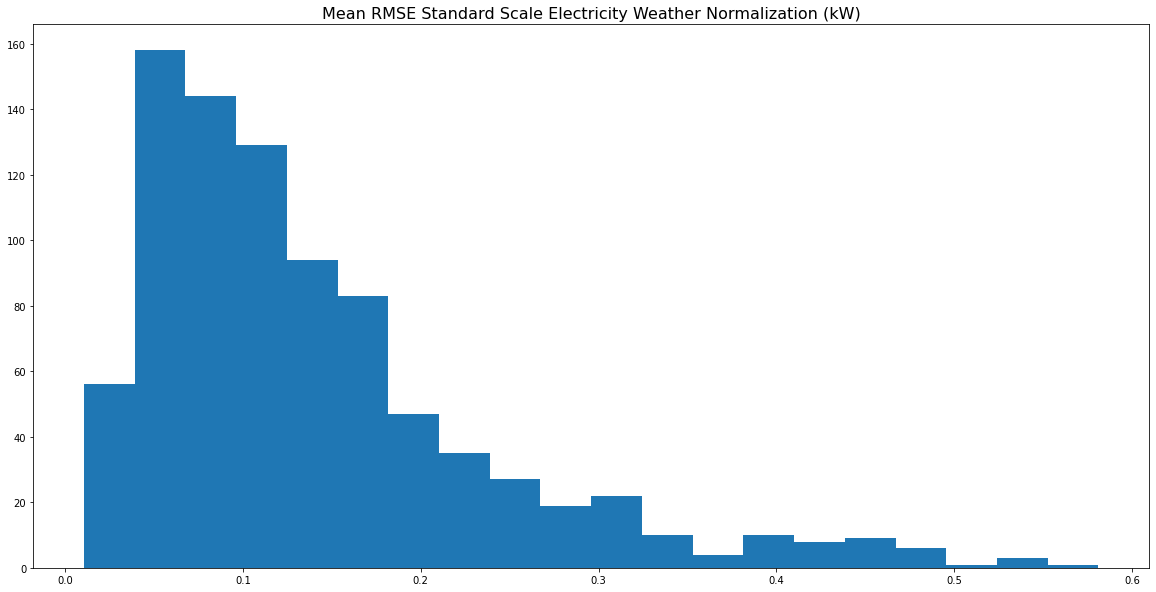

In [41]:
fig, ax = plt.subplots(figsize = (20,10))
ax.hist(list(results.values()), bins = 20)
ax.set_title("Mean RMSE Standard Scale Electricity Weather Normalization (kW)", fontsize = 16) 
plt.show()